# Melhoria do Random Forest para Classificação Binária:Machine Learning I

Trabalho de:
- Inês Castro up202304060
- Simão Gomes up202304752
- Soraia Costa up202305078


## Índice

- [Introducao](#introducao)
- [Pré-processamento](#pré-processamento)
- [Random Forest](#random-forest)
- [Escolha do Problema](#escolha-do-problema-que-mais-afeta-o-random-forest)
- [Hiperparâmetros](#hiperparametros)
- [Alteração ao RF](#mudança-no-algortimo)
- [Análise de Resultados-Testes Estatísticos](#comparação-de-resultados---testes-estatísticos)
- [Conclusão](#conclusão)

## Introdução
No âmbito da cadeira de aprendizagem computacional I, foi nos colocado o desafio de aprofundar a compreensão teórica e empírica de um algoritmo de classificação supervisionado, no nosso caso optamos pelo Random Forest. Com este projeto pretendemos inicialmente implementar o RF e perceber quais são os problemas dos dados reais que mais afetam o seu desempenho,  e posteriormente, modificá-lo de modo a melhorar o seu desempenho quando aplicado aos datasets dados.<br>
<br>Os dados do mundo real raramente são ideais, sendo comum apresentarem desafios como ruído, dados desconhecidos, desequilíbrio entre classes ou classificação multiclasse. Devido a estas características dos dados, nem sempre é fácil implementar os algoritmos, teoricamente ideais, a casos reais.<br> 
<br>Relativamente à implementação base utilizada neste projeto, esta baseia-se no repositório rushter/MLAlgorithms, não tendo sido utilizadas bibliotecas de alto nível como o scikit-learn. O impacto das modificações será avaliado através de benchmarking com conjuntos de dados adequados ao desafio escolhido, promovendo uma análise comparativa entre a versão original e a versão adaptada do algoritmo. 

## Pré-processamento
Foi realizado, noutro notebook (data_preprocessing.ipynb), um pré-processamento dos dados, com os seguintes passos:

**Análise Inicial**: Avaliamos o tipo de variáveis e a quantidade de valores ausentes (NaNs) por coluna

**Tratamento de NaNs**:
 - Para variáveis numéricas, os valores ausentes foram substituídos pela média
 - Para variáveis categóricas, utilizámos a moda (valor mais frequente)

**Codificação de Variáveis Categóricas**: A nossa implementação não suporta atributos não numéricos, pelo que foi necessário converter todas as variáveis categóricas:
- Quando existia uma ordem implícita entre os valores, foi atribuida uma escala numérica que traduzisse a ordem
- Quando não existia ordem, recorreu-se à técnica de one-hot encoding, criando uma coluna para cada categoria possível

**Adaptação do Target**: Como a nossa implementação não permitia valores negativos no target, foi necessário ajustar a escala em alguns casos, sem perder a informação.

## Random Forest
As random forests são um método de aprendizagem supervisionada amplamente utilizado para tarefas de classificação e regressão. <br>
<br>
<br>
**Como funciona o Random Forest?** 
<br>
<br>Este algoritmo baseia-se na combinação de múltiplas árvores de decisão, construídas de forma independente, para formar um modelo mais robusto e preciso. Tal como no método bagging, cada árvore é treinada com uma amostra aleatória dos dados (amostra bootstrap), mas o diferencial das florestas aleatórias está no uso adicional de aleatoriedade: em cada nó da árvore, apenas um subconjunto aleatório dos atributos preditivos é considerado para definir a melhor divisão. Esta estratégia reduz a correlação entre as árvores e contribui para melhorar a generalização do modelo. As florestas aleatórias são particularmente eficazes em conjuntos de dados com um grande número de atributos, oferecendo geralmente um bom desempenho preditivo e alguma interpretabilidade. No entanto, esta abordagem pode implicar um custo computacional elevado, especialmente quando se constroem muitas árvores ou se trabalha com grandes volumes de dados.
<br>
<br>
<br>
**Vantagens e desvantagens do Random Forest** 
<br>
<br>As florestas aleatórias apresentam diversas vantagens que as tornam uma escolha popular em problemas de classificação e regressão. Como método de ensemble, combina as previsões de múltiplas árvores de decisão, o que tende a aumentar a precisão e reduzir o overfitting. A aleatoriedade introduzida no processo  tanto na seleção das amostras de treino (com reposição) quanto na escolha aleatória de atributos em cada divisão contribui para modelos mais robustos e generalizáveis. Além disso, este método lida bem com dados de alta dimensionalidade, oferecendo um desempenho preditivo geralmente excelente mesmo em conjuntos de dados com muitos atributos.Outro ponto positivo é que os hiperparâmetros são relativamente fáceis de definir e ajustar.
<br>
<br>No entanto, as florestas aleatórias também apresentam algumas desvantagens. O principal fator negativo é o custo computacional: construir e avaliar um grande número de árvores exige recursos significativos, embora o processo possa ser paralelizado. Além disso, a interpretabilidade do modelo é reduzida em comparação com uma única árvore de decisão, o que pode dificultar a compreensão das regras subjacentes às previsões. Por fim, embora a aleatoriedade melhore a generalização, é necessário encontrar um número adequado de árvores para equilibrar desempenho e eficiência.


## Escolha do problema que mais afeta o Random Forest: 
Após selecionar o algoritmo que iríamos explorar, analisamos várias características dos dados que podem afetar negativamente o seu desempenho. Avaliamos o impacto de cada uma e chegámos às seguintes conclusões:

 - **Ruído e Outliers (Impacto moderado)**
 O Random Forest é robusto ao ruído graças ao ensemble, mas outliers extremos podem afetar divisões em algumas árvores.


 - **Desequilíbrio de classes (class imbalance) (Impacto mais relevante)**
 O algoritmo tende a favorecer a classe maioritária nos splits, o que reduz drasticamente o desempenho em classes minoritárias. Este foi o problema escolhido por ser o mais crítico.


 - **Classificação multiclasse (Impacto reduzido)**
 O Random Forest lida bem com múltiplas classes através da votação da maioria entre as árvores e nas folhas. Não exige alterações ao algoritmo e não compromete seriamente a performance.

**Escolha da característica do algoritmo Random Forest a abordar no trabalho**: Após as conclusões anteriores, decidimos abordar o impacto do class imbalance dos dados no desempenho do RF.


In [23]:
import os
import pandas as pd
import numpy as np

pastas = [r"C:\Users\Utilizador\Desktop\RandomForest_v2\clean_class_imbalance",r"C:\Users\Utilizador\Desktop\RandomForest_v2\clean_class_imbalance_small"]

minority_rates = []
linhastotais = 0
taxatotal = 0 
colunastotais = 0

for pasta in pastas:
    for arquivo in os.listdir(pasta):

        if arquivo.endswith(".csv"):

            caminho_arquivo = os.path.join(pasta, arquivo)
            df = pd.read_csv(caminho_arquivo)
            linhastotais += len(df)
            colunastotais += df.shape[1]

            y = df.iloc[:, -1].values

            classes, counts = np.unique(y, return_counts=True)

            min_count = np.min(counts)
            total = len(y)
            min_rate = min_count / total
            taxatotal += min_rate

            minority_rates.append({
                "dataset": arquivo,
                "minority_class": classes[np.argmin(counts)],
                "minority_rate": min_rate
            })

resultados_df = pd.DataFrame(minority_rates)
print(resultados_df)
print("\nTaxa média da classe minoritária", (taxatotal/48).round(2))
print("Número médio de linhas", int(linhastotais/48))
print("Número médio de colunas", int(colunastotais/48))

                                    dataset minority_class  minority_rate
0              dataset_1000_hypothyroid.csv              0       0.077147
1        dataset_1002_ipums_la_98-small.csv              0       0.105678
2         dataset_1014_analcatdata_dmft.csv              1       0.194479
3                    dataset_1016_vowel.csv              1       0.090909
4        dataset_1018_ipums_la_99-small.csv              0       0.064224
5           dataset_1020_mfeat-karhunen.csv              1       0.100000
6              dataset_1021_page-blocks.csv              0       0.102320
7              dataset_1022_mfeat-pixel.csv              1       0.100000
8            dataset_1039_hiva_agnostic.csv              1       0.035233
9                      dataset_1049_pc4.csv           True       0.122085
10                     dataset_1050_pc3.csv           True       0.102367
11                     dataset_1056_mc1.csv           True       0.007184
12                dataset_311_oil_spil

## Hiperparametros

**Análise do desempenho do Random Forest incial, sem qualquer alteraçoes**

Métricas comuns, como a accuracy, não são boas opções neste caso, visto que a accuracy, por exemplo, evidencia as previsões corretas feitas pelo modelo em relação ao total de previsões. No caso do class imbalance, a accuracy pode ser elevada e mesmo assim o modelo classificar pessimamente a classe minoritária, pois, como o nome indica, nada mais é que uma classe minoritária, portanto as previsões corretas da classe maioritária irão ofuscar totalmente as previsões erradas da classe minoritária.

**Para a análise de resultados**:
- Escolha das métricas: 
O objetivo principal do trabalho foi analisar e melhorar o desempenho do Random Forest em situações de desequilíbrio de classes. Por isso, selecionamos métricas que são sensíveis à performance da classe minoritária e mais informativas do que a simples accuracy.<br>

**F1_score** - O F1-score foi incluído por ser uma métrica que combina precisão e recall numa única medida harmónica. É especialmente útil em contextos desbalanceados, pois penaliza desproporções entre falsos positivos e falsos negativos. No caso deste trabalho, o F1-score permite avaliar se o modelo consegue não só identificar corretamente a classe minoritária (recall), mas também fazê-lo com previsões fiáveis (precisão). Como a modificação proposta pode afetar esse equilíbrio, o F1-score fornece uma visão agregada da qualidade da classificação.

**Recall da classe minoritária** - O recall da classe minoritária mede diretamente a proporção de instâncias da minoria que foram corretamente classificadas. Esta métrica é fundamental para este estudo, uma vez que o objetivo da alteração ao algoritmo Random Forest é precisamente aumentar a sensibilidade do modelo à classe menos representada. Uma melhoria no recall da minoria indicaria que a modificação está a cumprir o seu propósito de tornar o modelo mais justo e eficaz na deteção de exemplos raros.

**Precision-Recall AUC (PR AUC)** - A área sob a curva precision-recall foi escolhida em detrimento da ROC AUC devido à sua maior sensibilidade a desbalanceamentos severos entre classes. Em datasets onde a classe positiva (neste caso, a minoritária) é rara, a PR AUC oferece uma representação mais realista da capacidade do modelo de distinguir entre classes, focando-se apenas nas previsões positivas. Esta métrica é útil para avaliar se o modelo está a conseguir manter uma boa relação entre precisão e recall, mesmo quando favorece a classe minoritária.

**Balanced Accuracy** - A balanced accuracy representa a média do recall das duas classes, compensando o viés da accuracy tradicional, que tende a favorecer a classe maioritária. Esta métrica é especialmente relevante em contextos desbalanceados porque garante que ambas as classes têm peso igual na avaliação do modelo. No âmbito deste trabalho, permite perceber se a modificação proposta melhora o desempenho da classe minoritária sem comprometer demasiado a classificação da classe maioritária.

In [ ]:
import os
import pandas as pd
import numpy as np
import math
from mla.ensemble.random_forest import RandomForestClassifier 

pastas = [r"C:\Users\Utilizador\Desktop\RandomForest_v2\clean_class_imbalance",r"C:\Users\Utilizador\Desktop\RandomForest_v2\clean_class_imbalance_small"]

resultados = []
count = 1

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    classes = np.unique(y_true)
    precisions = []
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fp = np.sum((y_pred == cls) & (y_true != cls))
        precisions.append(tp / (tp + fp) if (tp + fp) > 0 else 0)
    return np.mean(precisions)

def recall(y_true, y_pred):
    classes = np.unique(y_true)
    recalls = []
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))
        recalls.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
    return np.mean(recalls)

def recall_minority(y_true, y_pred):
    classes, counts = np.unique(y_true, return_counts=True)
    min_class = classes[np.argmin(counts)]
    tp = np.sum((y_pred == min_class) & (y_true == min_class))
    fn = np.sum((y_pred != min_class) & (y_true == min_class))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def balanced_accuracy(y_true, y_pred):
    classes = np.unique(y_true)
    recalls = []
    for cls in classes:
        tp = np.sum((y_pred == cls) & (y_true == cls))
        fn = np.sum((y_pred != cls) & (y_true == cls))
        recalls.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
    return np.mean(recalls)

def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

def precision_recall_auc(y_true, y_score):
    if len(np.unique(y_true)) != 2:
        return np.nan
    y_true = y_true.astype(int)
    prob = y_score[:, 1]
    desc_order = np.argsort(-prob)
    y_true_sorted = y_true[desc_order]
    precision_vals = np.cumsum(y_true_sorted) / (np.arange(1, len(y_true_sorted) + 1))
    recall_vals = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
    return np.trapz(precision_vals, recall_vals)


# Função para dividir treino e teste
def split_train_test(X, y, test_size=0.3, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(test_size * X.shape[0])
    test_idx = indices[:test_size]
    train_idx = indices[test_size:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

max_depths = [5,10,25,50]
n_estimators = [10, 50, 100, 200]

Em primeiro lugar, analisamos o desempenho do algoritmo random_forest (rushter/MLAlgorithms) sem qualquer alteração sobre os datasets sem qualquer alteração, destacando o impacto dos valores associados a cada hiperparâmetro na performance: 
- O hiperparâmetro max_depth, isto é, a profundidade máxima estipulada para as árvores gerados pelo RF define a forma das árvores geradas, ou seja, se a max_depth for muito grande, teremos uma árvore profunda que aprende padrões muito detalhados( o que implica, baixo bias, alta variância e overfitting em árvores individuais), por outro lado, se a max_depth for muito pequena teremos uma árvore rasa que generaliza mais, mas que não consegue captar todos os padrões (o que implica alto bias, baixa variância e underfitting). Após a análise do gráfico, concluímos que o desempenho do RF, em geral, se mantém para profundidades máximas de 10, 20, 30, 40 e 50. Assim, optamos por utilizar a max_depth=10, visto que quanto maior o max_depth, maior o custo computacional e a performance não melhora significativamente acima de max_depth=10.

In [ ]:
for pasta in pastas:
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".csv"):
            caminho_arquivo = os.path.join(pasta, arquivo)
            print(f"\nTreino no dataset: {arquivo}")
            print(count, "de 48")
            count += 1

            
            df = pd.read_csv(caminho_arquivo)
            X = df.iloc[:, :-1].values
            y = df.iloc[:, -1].values
            num_atributos = X.shape[1]
        
            X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.3, random_state=42)


            for depth in max_depths:
            
                modelo = RandomForestClassifier(
                    n_estimators=50,
                    max_depth= depth,
                    max_features= math.floor(math.sqrt(num_atributos)),
                )
                modelo.fit(X_train, y_train)

                
                y_pred_prob = modelo._predict(X_test)
                y_pred = np.argmax(y_pred_prob, axis=1)

            
                f1 = f1_score(y_test, y_pred)
                rec_min = recall_minority(y_test, y_pred)
                pr_auc = precision_recall_auc(y_test, y_pred_prob)
                bal_acc = balanced_accuracy(y_test, y_pred)
                

                resultados.append({
                    "dataset": arquivo,
                    "max_depth": depth,
                    "f1_score": f1,
                    "recall_minority": rec_min,
                    "precision_recall_auc": pr_auc,
                    "balanced_accuracy": bal_acc
                })


resultados_df = pd.DataFrame(resultados)
resultados_df.to_csv("analise_inicial_rf.csv", index=False)
print("\nResultados:")
print(resultados_df)


c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

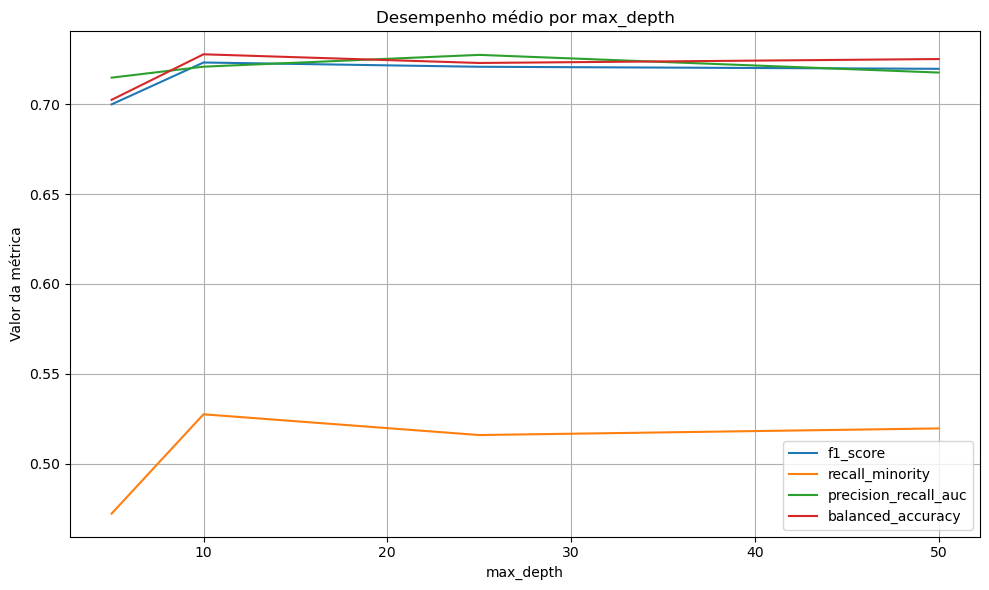

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

resultados_df=pd.read_csv(r'C:\Users\Utilizador\Desktop\RandomForest_v2\analise_inicial_depth_rf.csv')
mean_results = resultados_df.groupby("max_depth").mean(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
for metric in ["f1_score", "recall_minority", "precision_recall_auc", "balanced_accuracy"]:
    sns.lineplot(data=mean_results, x="max_depth", y=metric, label=metric)

plt.title("Desempenho médio por max_depth")
plt.xlabel("max_depth")
plt.ylabel("Valor da métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='max_depth', ylabel='recall_minority'>

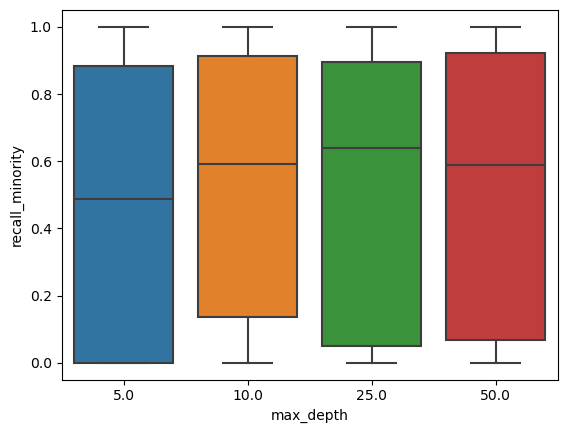

In [29]:
sns.boxplot(data=resultados_df, x="max_depth", y="recall_minority")

- Relativamente ao hiperparâmetro n_estimators, isto é, o número de árvores construídas na Random Forest,  teoricamente, o aumento do seu valor melhora a performance até certo ponto, a partir desse pouco o seu custo computacional e temporal não justifica o pouco ganho. Assim, optamos por analisar o desempenho do RF para 10, 50, 100, e 200 árvores. Após a análise do gráfico abaixo, concluímos que o número de árvores, entre 10 e 200, não influencia visivelmente a performance do algoritmo. Deste modo, optamos por utilizar n_estimators=100, uma vez que é o ponto do gráfico em que a métricas apresentam melhores valores, em média. 

In [ ]:
resultados_est=[]
count = 1

for pasta in pastas:
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".csv"):
            caminho_arquivo = os.path.join(pasta, arquivo)
            print(f"\nTreino no dataset: {arquivo}")
            print(count, "de 48")
            count += 1

            df = pd.read_csv(caminho_arquivo)
            X = df.iloc[:, :-1].values
            y = df.iloc[:, -1].values
            num_atributos = X.shape[1]
            
            X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.3, random_state=42)


            for n in n_estimators:
                
            
                modelo = RandomForestClassifier(
                    n_estimators=n,
                    max_depth= 10,
                    max_features= math.floor(math.sqrt(num_atributos)),
                )
                modelo.fit(X_train, y_train)

                
                y_pred_prob = modelo._predict(X_test)
                y_pred = np.argmax(y_pred_prob, axis=1)

                
                f1 = f1_score(y_test, y_pred)
                rec_min = recall_minority(y_test, y_pred)
                pr_auc = precision_recall_auc(y_test, y_pred_prob)
                bal_acc = balanced_accuracy(y_test, y_pred)
                

                resultados_est.append({
                    "dataset": arquivo,
                    "n_estimators": n,
                    "f1_score": f1,
                    "recall_minority": rec_min,
                    "precision_recall_auc": pr_auc,
                    "balanced_accuracy": bal_acc
                })


resultados_est_df = pd.DataFrame(resultados_est)
resultados_est_df.to_csv("analise_inicial_est_rf.csv", index=False)
print("\nResultados:")
print(resultados_est_df)

c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

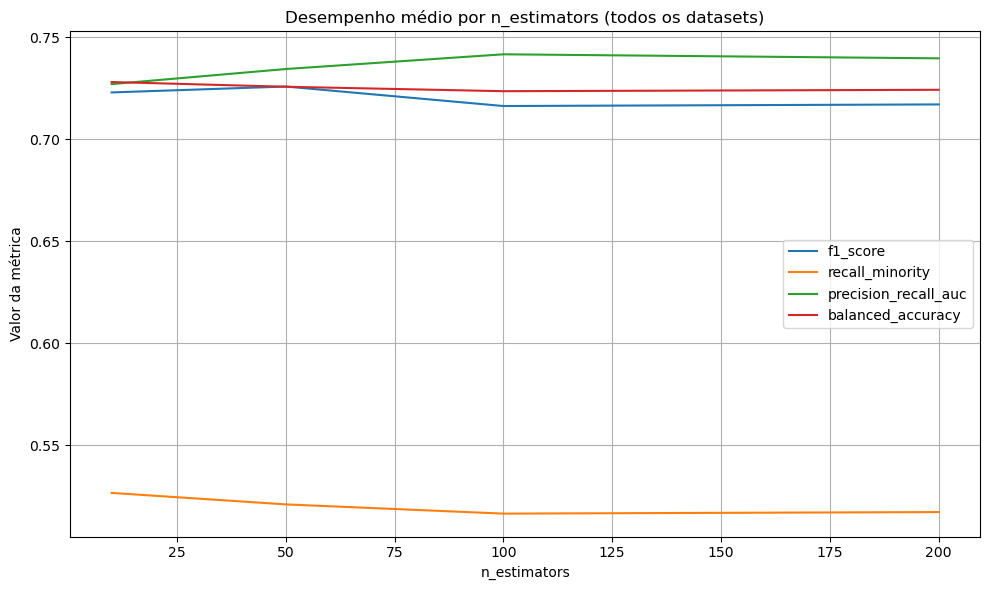

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df = pd.read_csv(r'C:\Users\Utilizador\Desktop\RandomForest_v2\analise_inicial_est_rf.csv')

metrics = ["f1_score", "recall_minority", "precision_recall_auc", "balanced_accuracy"]

mean_results = results_df.groupby("n_estimators")[metrics].mean().reset_index()

plt.figure(figsize=(10, 6))
for metric in metrics:
    sns.lineplot(data=mean_results, x="n_estimators", y=metric, label=metric)

plt.title("Desempenho médio por n_estimators (todos os datasets)")
plt.xlabel("n_estimators")
plt.ylabel("Valor da métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

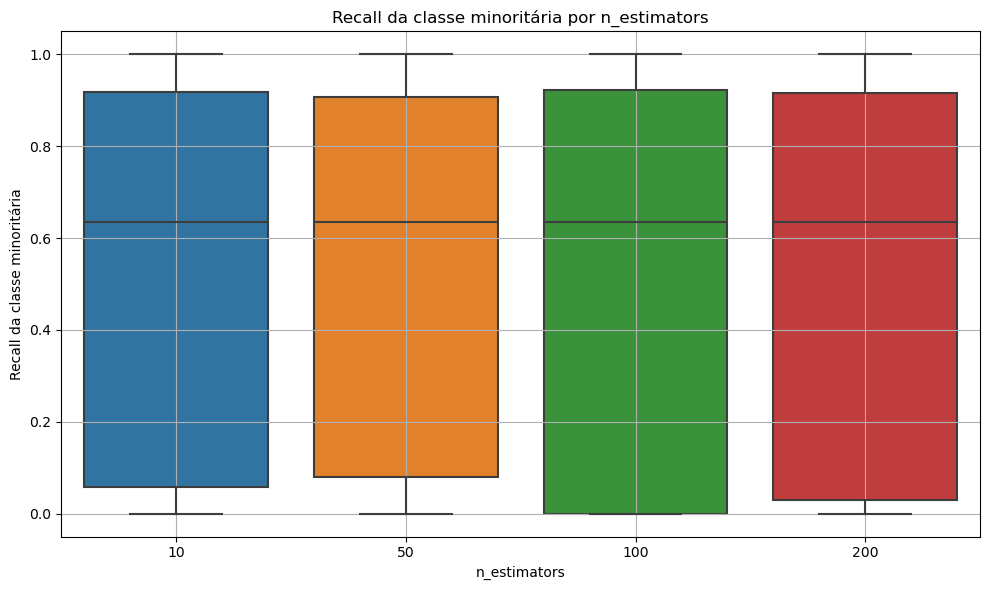

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df = pd.read_csv(r'C:\Users\Utilizador\Desktop\RandomForest_v2\analise_inicial_est_rf.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x="n_estimators", y="recall_minority")
plt.title("Recall da classe minoritária por n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Recall da classe minoritária")
plt.grid(True)
plt.tight_layout()
plt.show()



Em relação ao número máximo de atributos considerados em cada split, decidimos utilizar a raiz quadrada do número de atributos total, visto que se utilizarmos muitas features ou todas as features, as árvores ficam muito semelhantes entre si o que faz com que o RF crie um ensemble de árvores muito idênticas, ou seja, o RF irá apresentar baixa diversidade e alta correlação, enquanto que, se utilizarmos poucas features aleatórias, as árvores criadas ficam muito distintas e exploramos caminhos diferentes de decisão, o que ajuda a reduzir a variância sem aumentar muito o bias. Assim, utilizamos a raiz quadrada do número de atributos, pois fornece diversidade suficiente entre as árvores e permite boas decisões locais.<br>
<br>Por fim, o número mínimo de amostras necessárias para dividir um nó interno também influencia significativamente o desempenho do algoritmo, apresentando dois extremos: se o min_samples_split for muito pequeno, as árvores crescem muito (ou seja, árvores com mais nós e mais profundas), o que pode ajustar-se aos dados de treino, logo, este caso capta mais detalhes e tem maior risco de overfitting, por outro lado, se o min_samples_split for alto, as árvores são mais rasas (ocorrem menos divisões) , o que cria modelos mais simples e rápidos, com isto, há menor risco de overfitting, no entanto, há a possibilidade de causar underfitting. De modo a equilibrar estes dois extremos, optamos por utilizar min_samples_split=10, já que os datasets utilizados no treino apresentam em média 1866 linhas, ou seja, tratam-se de datasets de dimensão média.


In [5]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Utilizador\Desktop\RandomForest_v2\analise_inicial_est_rf.csv')
df_100 = df[df["n_estimators"] == 100]
df_100 = df_100.drop("n_estimators",axis=1)
df_100.to_csv("analise_semmudanca.csv", index=False)

**Hiperparâmetros utilizados na versão final do algoritmo:**
- Número de estimadores (árvores) - 100;
- Número mínimo de Samples - 10;
- Profundidade máxima - 10;
- Número máximo de features - sqrt(nºatributos);



Após executar o algoritmo e analisar uma amostra aleatória da floresta, consideramos que houve melhoria quando a proporção de elementos da classe minoritária aumenta em relação à distribuição original.<br>
<br>Se, no final, a classe minoritária passa a representar uma percentagem maior na amostra do que inicialmente, então consideramos que o modelo conseguiu equilibrar a distribuição, tratando a classe minoritária com maior relevância — aproximando-a da classe maioritária.

## Mudança no algortimo
**Random Forest com Alteração Heurística nas Folhas para Melhor Detecção de Classes Minoritárias** <br>
<br>Nesta proposta, em vez de seguir a regra habitual de prever a classe maioritária, os nós folha passam a prever a classe minoritária sob a condição da frequência da classe minoritária na folha ser superior à sua frequência global no subconjunto utilizado para treinar a árvore em questão.<br>
<br>O objetivo desta alteração é tornar o modelo mais sensível a padrões locais fortes associados à classe minoritária, sem cair no erro de overfitting a ruído estatístico (o bias a classificar a classe maioritária). A ideia é que, se uma folha apresenta uma concentração anormalmente alta de exemplos da classe menos representada, isso pode indicar que vale a pena classificar para aumentar a capacidade de deteção dessa classe. 

In [ ]:
'''
                # Probability for classification task
                leaf_counts = np.bincount(targets["y"], minlength=self.n_classes)
                leaf_distribution = leaf_counts / targets["y"].shape[0]

                # Minority class
                tree_distribution = self.tree_class_distribution  
                minority_class = np.argmin(tree_distribution)

       ---->    if leaf_distribution[minority_class] > x * tree_distribution[minority_class]:    <----
                    # Predict minority class
                    self.outcome = minority_class
                else:
                    # Use majority
                    self.outcome = leaf_distribution
'''

#### **Comparação com a taxa inicial**

In [ ]:
resultados_mudanca1x=[]
count = 1

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mla3.ensemble.random_forest import RandomForestClassifier 

for pasta in pastas:
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".csv"):
            
            caminho_arquivo = os.path.join(pasta, arquivo)
            print(f"\nTreino no dataset: {arquivo}")
            print(count, "de 48")
            count += 1

            
            df = pd.read_csv(caminho_arquivo)
            X = df.iloc[:, :-1].values
            y = df.iloc[:, -1].values
            num_atributos = X.shape[1]
            
            X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.3, random_state=42)
            
        
            modelo = RandomForestClassifier(
                n_estimators=100,
                max_depth= 10,
                max_features= math.floor(math.sqrt(num_atributos)),
            )
            modelo.fit(X_train, y_train)

    
            y_pred_prob = modelo._predict(X_test)
            y_pred = np.argmax(y_pred_prob, axis=1)
        
            
            f1 = f1_score(y_test, y_pred)
            rec_min = recall_minority(y_test, y_pred)
            pr_auc = precision_recall_auc(y_test, y_pred_prob)
            bal_acc = balanced_accuracy(y_test, y_pred)
                

            resultados_mudanca1x.append({
                "dataset": arquivo,
                "f1_score": f1,
                "recall_minority": rec_min,
                "precision_recall_auc": pr_auc,
                "balanced_accuracy": bal_acc
                })
            
resultados_mudanca_df1x = pd.DataFrame(resultados_mudanca1x)
resultados_mudanca_df1x.to_csv("analise_mudanca1x.csv", index=False)
print("\nResultados:")
print(resultados_mudanca_df1x)

#### **Comparação com o dobro da taxa inicial**

In [ ]:
resultados_mudanca2x=[]
count = 1

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mla2.ensemble.random_forest import RandomForestClassifier 

for pasta in pastas:
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".csv"):
            
            caminho_arquivo = os.path.join(pasta, arquivo)
            print(f"\nTreino no dataset: {arquivo}")
            print(count, "de 48")
            count += 1

            
            df = pd.read_csv(caminho_arquivo)
            X = df.iloc[:, :-1].values
            y = df.iloc[:, -1].values
            num_atributos = X.shape[1]
        
            X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.3, random_state=42)
            
            
            modelo = RandomForestClassifier(
                n_estimators=100,
                max_depth= 10,
                max_features= math.floor(math.sqrt(num_atributos)),
            )
            modelo.fit(X_train, y_train)


            y_pred_prob = modelo._predict(X_test)
            y_pred = np.argmax(y_pred_prob, axis=1)
            
        
            f1 = f1_score(y_test, y_pred)
            rec_min = recall_minority(y_test, y_pred)
            pr_auc = precision_recall_auc(y_test, y_pred_prob)
            bal_acc = balanced_accuracy(y_test, y_pred)
                

            resultados_mudanca2x.append({
                "dataset": arquivo,
                "f1_score": f1,
                "recall_minority": rec_min,
                "precision_recall_auc": pr_auc,
                "balanced_accuracy": bal_acc
                })
            
resultados_mudanca_df2x = pd.DataFrame(resultados_mudanca2x)
resultados_mudanca_df2x.to_csv("analise_mudanca2x.csv", index=False)
print("\nResultados:")
print(resultados_mudanca_df2x)

#### **Comparação com o triplo da taxa inicial**

In [ ]:
resultados_mudanca3x=[]
count = 1

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mla4.ensemble.random_forest import RandomForestClassifier 

for pasta in pastas:
    for arquivo in os.listdir(pasta):
        if arquivo.endswith(".csv"):
            
            caminho_arquivo = os.path.join(pasta, arquivo)
            print(f"\nTreino no dataset: {arquivo}")
            print(count, "de 48")
            count += 1

            
            df = pd.read_csv(caminho_arquivo)
            X = df.iloc[:, :-1].values
            y = df.iloc[:, -1].values
            num_atributos = X.shape[1]
        
            X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.3, random_state=42)
            
            
            modelo = RandomForestClassifier(
                n_estimators=100,
                max_depth= 10,
                max_features= math.floor(math.sqrt(num_atributos)),
            )
            modelo.fit(X_train, y_train)

            
            y_pred_prob = modelo._predict(X_test)
            y_pred = np.argmax(y_pred_prob, axis=1)
            
        
            f1 = f1_score(y_test, y_pred)
            rec_min = recall_minority(y_test, y_pred)
            pr_auc = precision_recall_auc(y_test, y_pred_prob)
            bal_acc = balanced_accuracy(y_test, y_pred)
                
            resultados_mudanca3x.append({
                "dataset": arquivo,
                "f1_score": f1,
                "recall_minority": rec_min,
                "precision_recall_auc": pr_auc,
                "balanced_accuracy": bal_acc
                })
            
resultados_mudanca_df3x = pd.DataFrame(resultados_mudanca3x)
resultados_mudanca_df3x.to_csv("analise_mudanca3x.csv", index=False)
print("\nResultados:")
print(resultados_mudanca_df3x)

#### **Comparação entre as diferentes versões**

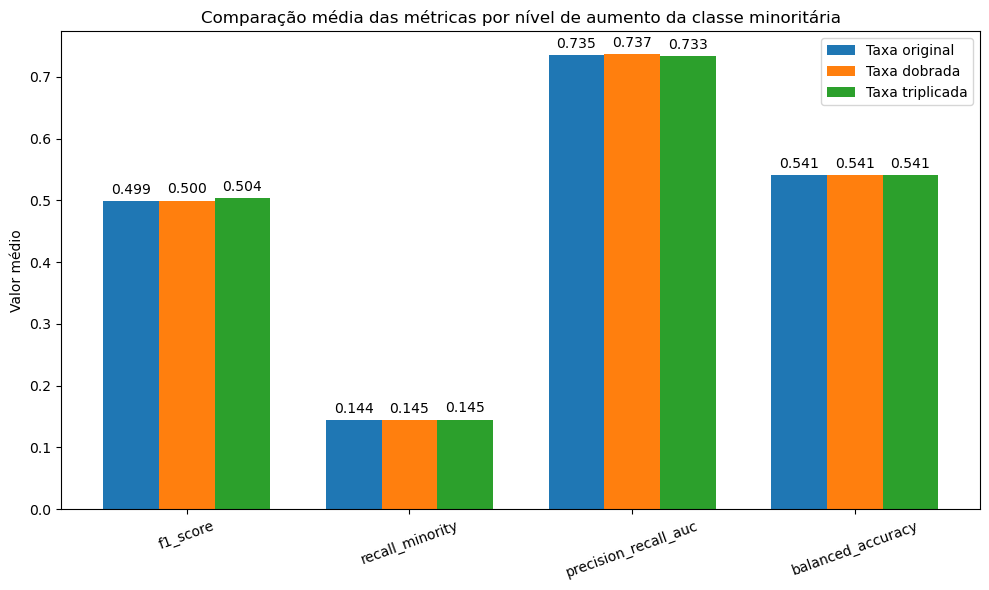

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df1 = pd.read_csv('analise_mudanca1x.csv')
df2 = pd.read_csv('analise_mudanca2x.csv')
df3 = pd.read_csv('analise_mudanca3x.csv')


metrics = ['f1_score', 'recall_minority', 'precision_recall_auc', 'balanced_accuracy']


avg1 = df1[metrics].mean()
avg2 = df2[metrics].mean()
avg3 = df3[metrics].mean()


plot_df = pd.DataFrame({
    'Metric': metrics,
    'Taxa original': avg1.values,
    'Taxa dobrada': avg2.values,
    'Taxa triplicada': avg3.values
})

x = np.arange(len(metrics))  
width = 0.25 

fig, ax = plt.subplots(figsize=(10, 6))


bars1 = ax.bar(x - width, plot_df['Taxa original'], width, label='Taxa original')
bars2 = ax.bar(x, plot_df['Taxa dobrada'], width, label='Taxa dobrada')
bars3 = ax.bar(x + width, plot_df['Taxa triplicada'], width, label='Taxa triplicada')


ax.set_ylabel('Valor médio')
ax.set_title('Comparação média das métricas por nível de aumento da classe minoritária')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=20)
ax.legend()


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')


add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()

## Comparação de resultados - Testes Estatísticos

#### 1. Emparelhamento dos Dados
Emparelhar os dados "antes" e "depois" da mudança de algoritmo por dataset permite obter pares dependentes e calcular diferenças para cada métrica.

#### 2. Verificação da Normalidade
Utiliza-se o **teste de Shapiro-Wilk** sobre a diferença depois - antes para cada métrica.

- Se os dados forem normais -> aplicar **t-teste emparelhado**.
- Se os dados não forem normais -> aplicar **teste de Wilcoxon**.

##### Teste de Shapiro-Wilk
**Hipóteses:**
- H₀: os dados seguem distribuição normal
- H₁: os dados não seguem distribuição normal

**Estatística do teste:**
$$
W = \frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$
Onde:
- $x_{(i)}$ são os dados ordenados
- $a_i$ são coeficientes baseados na distribuição normal teórica
- $\bar{x}$ é a média amostral

**Interpretação do p-value:**
- Se $p > \alpha$ (ex: 0.05), não se rejeita $H_0$ → dados compatíveis com normalidade
- Se $p < \alpha$, rejeita-se $H_0$ → dados não seguem distribuição normal

#### 3. Escolha do Teste Estatístico
##### 3.1 Teste t de Student emparelhado (paramétrico)
**Hipóteses:**
- $H_0: \mu_D = 0$
- $H_1: \mu_D > 0$

**Estatística do teste:**
$$
t = \frac{\bar{D}}{s_D / \sqrt{n}}
$$
Onde:
- $\bar{D}$ é a média das diferenças
- $s_D$ é o desvio padrão das diferenças
- $n$ é o número de pares
  
##### 3.2 Teste de Wilcoxon (não paramétrico)
**Usado quando:**
- Os $D_i$ não são normalmente distribuídos
- Queremos uma alternativa robusta a outliers

**Procedimento:**
- Calcular $D_i = Y_i - X_i$
- Eliminar casos onde $D_i = 0$
- Ordenar $|D_i|$ e atribuir postos (ranks)
- Somar os ranks com sinal positivo

**Hipóteses:**
- $H_0$: mediana das diferenças = 0
- $H_1$: mediana das diferenças > 0

#### 4. Correção de Bonferroni
Quando se testam várias métricas simultaneamente, há risco de obter falsos positivos (erro tipo I). A **correção de Bonferroni** ajusta o nível de significância dividindo $\alpha$ pelo número de testes:
$$
\alpha' = \frac{\alpha}{n}
$$
Isso torna os resultados mais conservadores, reduzindo o risco de erros tipo I, mas pode aumentar o risco de erros tipo II (falsos negativos).

#### 5. Formulação das Hipóteses
Para cada métrica avaliada:
- **H₀:** não houve melhoria; média das diferenças = 0
- **H₁:** houve melhoria; média das diferenças > 0 (teste unilateral à direita)
- **H₂:** houve pioria; média das diferenças < 0 (teste unilateral à esquerda)

#### 6. Importância do p-value
O p-value representa a probabilidade de obter os dados observados (ou mais extremos), assumindo que $H_0$ é verdadeira.
- Se $p < \alpha$, rejeita-se $H_0$ → evidência estatística de melhoria
- Se $p \geq \alpha$, não se rejeita $H_0$ → sem evidência suficiente de melhoria

#### 7. Vantagens da Abordagem Estatística
- Garante rigor científico na avaliação de alterações ao algoritmo
- Distingue melhorias reais de variações aleatórias
- Fornece evidência quantitativa para justificar decisões
- Reduz a subjetividade na comparação direta de métricas

#### Fórmulas das Métricas Utilizadas


#### 1. F1-score
$$
F1 = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}}
$$


#### 2. Recall da Classe Minoritária
$$
Recall = \frac{\text{Verdadeiros Positivos}}{\text{Verdadeiros Positivos} + \text{Falsos Negativos}}
$$
No nosso caso, calculado apenas sobre a classe minoritária.


#### 3. Precision-Recall AUC
Não tem uma fórmula única analítica, mas é a **área sob a curva** que representa a relação entre:
- Eixo X: Recall
- Eixo Y: Precisão

É geralmente calculada numericamente através da integração:
$$
\text{PR AUC} = \int_0^1 \text{Precisão}(r) \, dr
$$


#### 4. Balanced Accuracy
$$
\text{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right)
$$
Onde:
- TP = Verdadeiros Positivos
- FN = Falsos Negativos
- TN = Verdadeiros Negativos
- FP = Falsos Positivos

Para a métrica precision_recall_auc, o teste de Shapiro-Wilk indicou distribuição normal → foi usado o t-teste emparelhado.<br>

Para f1_score, recall_minority, balanced_accuracy, o teste indicou distribuição não normal → foi usado o Wilcoxon.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon, shapiro


df_depois = pd.read_csv("analise_mudanca.csv")
df_antes = pd.read_csv("analise_semmudanca.csv")

df_depois = df_depois.sort_values(by="dataset").reset_index(drop=True)
df_antes = df_antes.sort_values(by="dataset").reset_index(drop=True)

assert (df_depois['dataset'] == df_antes['dataset']).all(), "Os datasets não estão alinhados!"

metricas = ['f1_score', 'recall_minority', 'precision_recall_auc', 'balanced_accuracy']
resultados = []

for metrica in metricas:
    antes = df_antes[metrica]
    depois = df_depois[metrica]
    diferencas = depois - antes

    #Teste de normalidade (Shapiro-Wilk)
    stat_normalidade, p_normalidade = shapiro(diferencas)
    normal = p_normalidade > 0.05

    #Aplicação do teste apropriado
    if normal:
        stat_test, p_valor = ttest_rel(depois, antes, alternative='greater')
        teste_usado = 't-teste emparelhado'
    else:
        stat_test, p_valor = wilcoxon(depois, antes, alternative='greater')
        teste_usado = 'Wilcoxon'

    resultados.append({
        "métrica": metrica,
        "média_antes": antes.mean(),
        "média_depois": depois.mean(),
        "diferença média": diferencas.mean(),
        "normalidade (p)": round(p_normalidade, 4),
        "teste": teste_usado,
        "p-valor": round(p_valor, 4)
    })

#Correção de Bonferroni
alpha = 0.05
alpha_corrigido = alpha / len(metricas)

df_resultados = pd.DataFrame(resultados)
df_resultados["significativo"] = df_resultados["p-valor"] < alpha_corrigido

df_resultados.to_csv("resultados_estatisticos.csv", index=False)

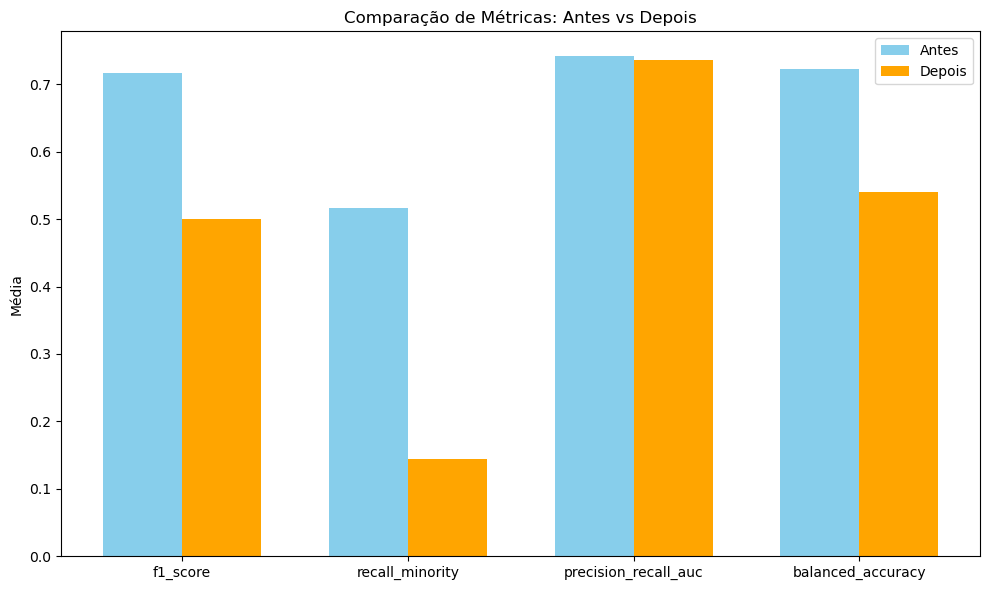

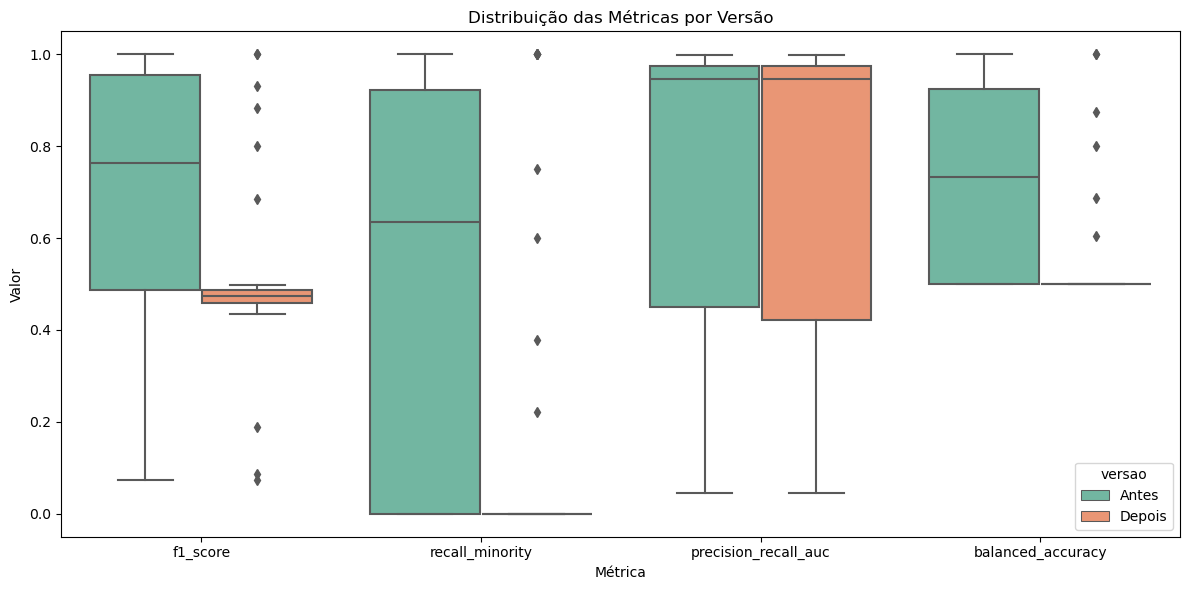

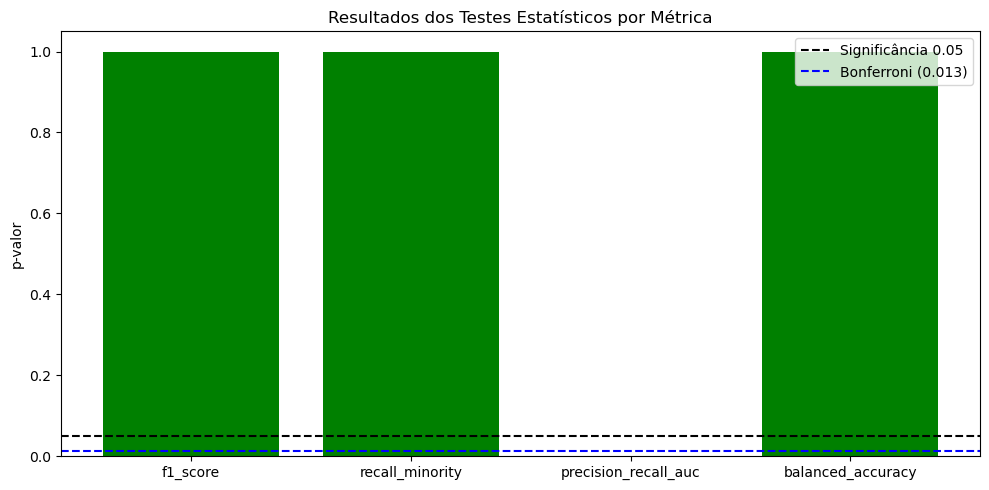

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df_dif = df_depois.copy()
metricas = ['f1_score', 'recall_minority', 'precision_recall_auc', 'balanced_accuracy']
for col in metricas:
    df_dif[col + "_diff"] = df_depois[col] - df_antes[col]


plt.figure(figsize=(10, 6))
largura = 0.35
x = np.arange(len(metricas))
val_antes = [df_antes[m].mean() for m in metricas]
val_depois = [df_depois[m].mean() for m in metricas]

plt.bar(x - largura/2, val_antes, width=largura, label="Antes", color='skyblue')
plt.bar(x + largura/2, val_depois, width=largura, label="Depois", color='orange')

plt.xticks(x, metricas)
plt.ylabel("Média")
plt.title("Comparação de Métricas: Antes vs Depois")
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
df_plot = pd.concat([
    df_antes[metricas].assign(versao='Antes'),
    df_depois[metricas].assign(versao='Depois')
])
df_melt = df_plot.melt(id_vars='versao', var_name='Métrica', value_name='Valor')

sns.boxplot(x='Métrica', y='Valor', hue='versao', data=df_melt, palette='Set2')
plt.title("Distribuição das Métricas por Versão")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
cores = ['green' if row['teste'] == 'Wilcoxon' else 'red' for _, row in df_resultados.iterrows()]
plt.bar(df_resultados['métrica'], df_resultados['p-valor'], color=cores)

plt.axhline(0.05, color='black', linestyle='--', label='Significância 0.05')
plt.axhline(0.05 / len(metricas), color='blue', linestyle='--', label=f'Bonferroni ({0.05 / len(metricas):.3f})')
plt.ylabel("p-valor")
plt.title("Resultados dos Testes Estatísticos por Métrica")
plt.legend()
plt.tight_layout()
plt.show()

## Conclusão
<br> Apesar de esta abordagem poder levar a uma ligeira diminuição nas métricas globais de desempenho (como a acurácia ou a precisão), é uma tentativa de equilibrar a deteção da classe minoritária, um problema comum em contextos com classes desiquilibradas.